## 패키지 로딩

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

%matplotlib inline

mpl.rcParams.update({'font.size': 15})

## Data Roading

### 1. Excel
### 2. CSV


### Excel
### pd.read_excel() 함수를 통해 열어주는 것이 일반적 

In [11]:
kspi_idx = pd.read_excel('Data/kspi_idx_clse.xlsx', skiprows = 13, 
                        names = ['Frequency', 'KOSPI','Unnamed: 2'])\
             .drop('Unnamed: 2', axis = 1)\
             .set_index('Frequency')
        
kspi_idx.head()

,KOSPI
Frequency,
2010-12-29,2043.49
2010-12-30,2051.00
2011-01-03,2070.08
2011-01-04,2085.14
2011-01-05,2082.55


### CSV

#### CSV 란 콤마(,) 혹은 쉼표(;) 등으로 데이터가 나누어져 있는 파일을 말함. 엑셀에 비해 가볍고 엑셀 스프래드시트에 비해 범용적이기 때문에 데이터 분석을 하게 되면 많이보는 형식입니당~

### Note

#### 한글 파일을 열다보면 Encoding 문제가 생김. encoding option 을 통해 오류를 방지합시다. 

In [3]:
kspi_clse_st = pd.read_csv('Data/kspi_st_clse.csv', encoding= 'cp949')

In [4]:
kspi_clse_st.head()

,TRD_DT,삼성전자,SK하이닉스,현대차,셀트리온,삼성바이오로직스,POSCO,삼성물산,KB금융,LG화학,...,한진해운,대우증권스팩,동양밸류스팩,우리스팩1호,경남은행.1,연합과기,중국원양자원,평산차업 KDR,중국고섬,SBI모기지
0,2000-01-04,305500,505463,20700,NaN,NaN,142000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-05,279000,453444,20800,NaN,NaN,149500,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-06,281000,429889,19700,NaN,NaN,144500,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-07,277000,425963,20300,NaN,NaN,145000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-10,288500,422037,20000,NaN,NaN,143000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### TRD_DT 컬럼을 Datetime 형식으로 변경

In [5]:
kspi_clse_st['TRD_DT'] = pd.to_datetime(kspi_clse_st['TRD_DT'])
kspi_clse_st = kspi_clse_st.set_index('TRD_DT')

kspi_clse_st.head() ## 의도한 대로 나왔는지 확인

,삼성전자,SK하이닉스,현대차,셀트리온,삼성바이오로직스,POSCO,삼성물산,KB금융,LG화학,현대모비스,...,한진해운,대우증권스팩,동양밸류스팩,우리스팩1호,경남은행.1,연합과기,중국원양자원,평산차업 KDR,중국고섬,SBI모기지
TRD_DT,,,,,,,,,,,,,,,,,,,,,
2000-01-04,305500,505463,20700,NaN,NaN,142000,NaN,NaN,NaN,6610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,279000,453444,20800,NaN,NaN,149500,NaN,NaN,NaN,7100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,281000,429889,19700,NaN,NaN,144500,NaN,NaN,NaN,6540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,277000,425963,20300,NaN,NaN,145000,NaN,NaN,NaN,6520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,288500,422037,20000,NaN,NaN,143000,NaN,NaN,NaN,6280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 데이터 개괄 분석

### 데이터의 Raw 개수와 Column 개수를 확인

In [97]:
kspi_clse_st.shape

(4527, 1129)

### 데이터의 기간을 파악해보긔

#### Index 를 활용하즈아!~

In [85]:
n = kspi_clse_st.shape[0] - 1
st_date = kspi_clse_st.index[0]
ed_date = kspi_clse_st.index[n]
per = (ed_date-st_date).days + 1
print("시작일: " + str(st_date), "종료일: " + str(ed_date),  "기간: " + str(per) + "일")

시작일: 2000-01-04 00:00:00 종료일: 2018-04-27 00:00:00 기간: 6689일


### 각 일별 상장 종목의 개수를 살펴보즈아!

#### Apply 함수의 활용 
#### Boolean

In [81]:
def isnotnot(x):
    a = np.isnan(x)
    
    return ~a
    
kspi_trdt = kspi_clse_st.apply(isnotnot, axis = 0).sum(axis = 1)
kspi_trdt.head()

TRD_DT
2000-01-04    707
2000-01-05    707
2000-01-06    707
2000-01-07    707
2000-01-10    707
dtype: int64

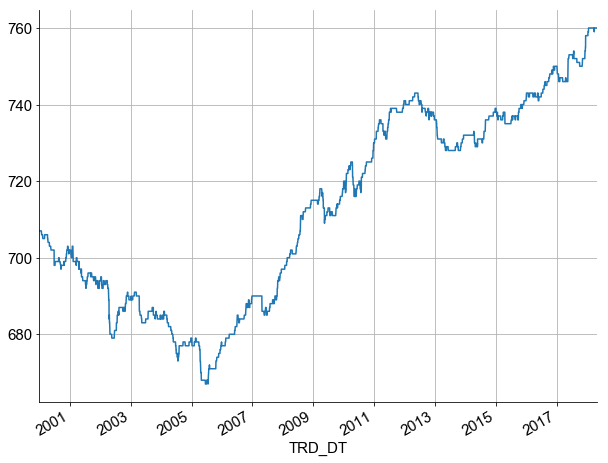

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches((10,8))

sns.set_style('whitegrid')
kspi_trdt.plot(ax = ax)
sns.despine()

### 각 종목 수익률 산출

#### pct_change() 메소드를 통해 산출할 수 있음. 간단간단!

##### 전 주식에 대한 2000.01.04 데이터는 존재하지 않음. 그러므로 삭제
    ### - 시작일이 2000.01.04의 데이터를 사용하였기 때문에 수익률을 계산하면 2000.12.29일의 데이터는 Null 값으로 처리됩니다.
##### 코스피에 대한 2000.12.29 데이터는 존재하지 않음. 그러므로 삭제
    ### - 시작일이 2000.12.29의 데이터를 사용하였기 때문에 수익률을 계산하면 2000.12.29일의 데이터는 Null 값으로 처리됩니다.

In [91]:
kspi_clse_rt = kspi_clse_st\
                .pct_change()\
                .drop(pd.to_datetime('2000-01-04'))
kspi_idx_rt = kspi_idx\
                .pct_change()\
                .drop(pd.to_datetime('2010-12-29'))

In [13]:
kspi_clse_rt.head()

,삼성전자,SK하이닉스,현대차,셀트리온,삼성바이오로직스,POSCO,삼성물산,KB금융,LG화학,현대모비스,...,한진해운,대우증권스팩,동양밸류스팩,우리스팩1호,경남은행.1,연합과기,중국원양자원,평산차업 KDR,중국고섬,SBI모기지
TRD_DT,,,,,,,,,,,,,,,,,,,,,
2000-01-05,-0.086743,-0.102914,0.004831,NaN,NaN,0.052817,NaN,NaN,NaN,0.074130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,0.007168,-0.051947,-0.052885,NaN,NaN,-0.033445,NaN,NaN,NaN,-0.078873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,-0.014235,-0.009133,0.030457,NaN,NaN,0.003460,NaN,NaN,NaN,-0.003058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,0.041516,-0.009217,-0.014778,NaN,NaN,-0.013793,NaN,NaN,NaN,-0.036810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-11,0.000000,0.037210,0.000000,NaN,NaN,0.034965,NaN,NaN,NaN,0.003185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
kspi_idx_rt.head()

,KOSPI
Frequency,
2010-12-30,0.003675
2011-01-03,0.009303
2011-01-04,0.007275
2011-01-05,-0.001242
2011-01-06,-0.002372


### S전자의 누적 수익률을 알아보자


#### 00.01.04 ~ 08.04.24 간의 누적 수익률은?

In [20]:
#  kspi_clse_rt['삼성전자'] + 1 
sam_rt = kspi_clse_rt['삼성전자'].sub(-1, fill_value = -1).prod() * 100
print("삼성전자 누적수익률 %5.3f" % sam_rt + "%")

삼성전자 누적수익률 867.430%


In [21]:
sam_cump_rt = kspi_clse_rt['삼성전자'].sub(-1).cumprod()
sam_cump_rt.head()

TRD_DT
2000-01-05    0.913257
2000-01-06    0.919804
2000-01-07    0.906710
2000-01-10    0.944354
2000-01-11    0.944354
Name: 삼성전자, dtype: float64

### S전자 일별 누적수익률의 추세를 알고 싶다면?

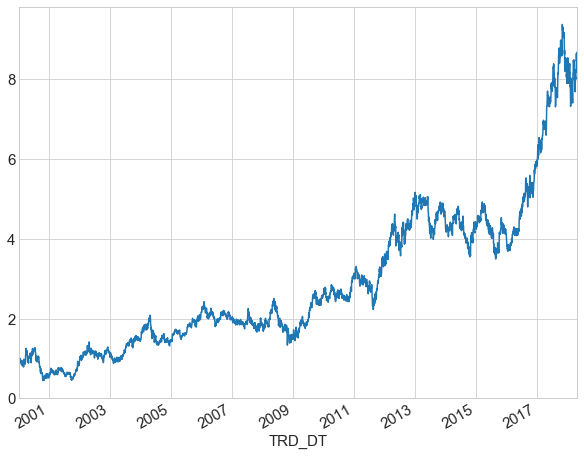

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches((10, 8))

sam_cump_rt.plot(ax = ax)

### 상장폐지된 종목의 수익률

#### prod 함수 적용시 nan은 계산하지 않음. 상장폐지 된 종목의 경우 수익률은  -100%인데, 이를 반영하지 않으면 수익률이 왜곡될 수 있음.

#### 예시 - 에스와이코퍼레이션 - 2013.09.01~2013.09.30

In [15]:
exp_sy = kspi_clse_rt['에스와이코퍼레이션'].loc['2013-09-01':'2013-09-30']
exp_sy

TRD_DT
2013-09-02        0.000000
2013-09-03        0.000000
2013-09-04        0.000000
2013-09-05        0.000000
2013-09-06        0.000000
2013-09-09        0.000000
2013-09-10        0.000000
2013-09-11    66999.000000
2013-09-12       -0.454478
2013-09-13       -0.121751
2013-09-16        0.366044
2013-09-17       -0.167617
2013-09-23       -0.397260
2013-09-24       -0.795455
2013-09-25             NaN
2013-09-26             NaN
2013-09-27             NaN
2013-09-30             NaN
Name: 에스와이코퍼레이션, dtype: float64

### 상폐가 되었는데도 수익률이 4500%로 계산됨

In [16]:
exp_sy.sub(-1).prod()

4500.0000000000009

### sub 함수 내의 파라미터 fill_value 를 -1로 넣어주면 해결 가능

In [17]:
exp_sy.sub(-1,fill_value=-1).prod()

0.0

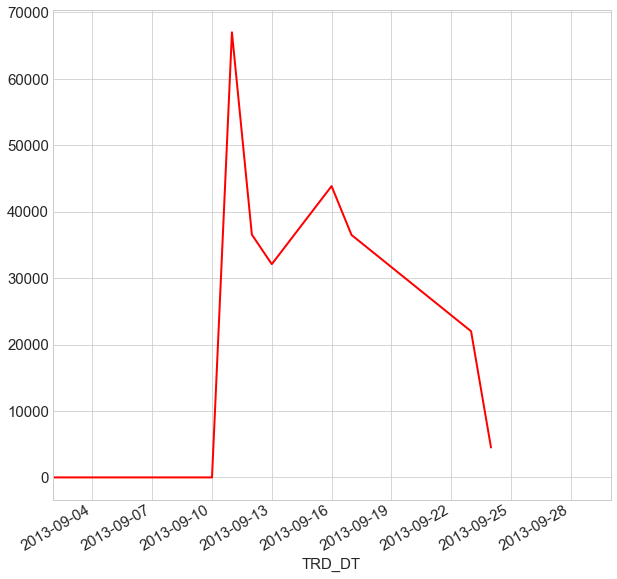

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches((10, 10))

exp_sy.sub(-1).cumprod().plot(ax = ax, linewidth = 2, color = 'r')

### sub 함수 내의 파라미터 fill_value 를 -1로 넣어주면 해결 가능

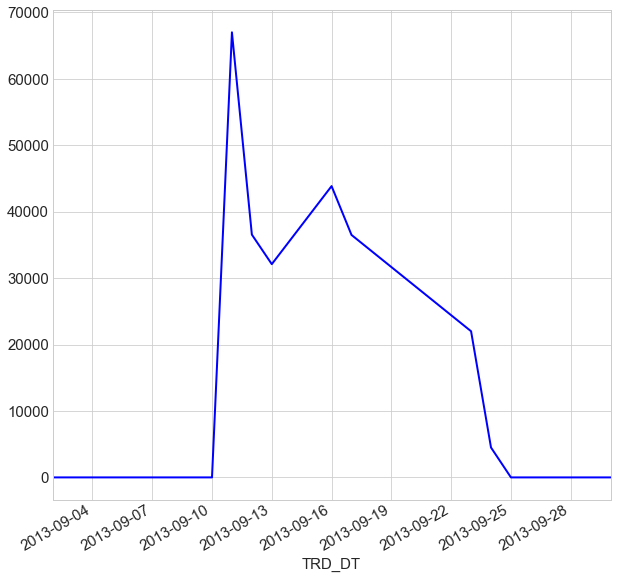

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches((10, 10))

exp_sy.sub(-1,fill_value=-1).cumprod().plot(ax = ax, linewidth = 2, color = 'b')

### 각 종목의 연별 수익률 산출 후 각 년별 Top 10을 산출해보자

#### Resample 기능을 이용하면 산출 가능

#### 각 종목의 연별 누적수익률 산출

In [23]:
kspi_2000 = kspi_clse_rt.sub(-1, fill_value = -1).resample('A').apply(np.nanprod, axis = 0)

#### 2017년의 Winner 는 누구일까?

##### 수익률 상위 10개 주식을 산출

    #### iloc 사용
    #### head() 메서드를 사용

In [82]:
kspi_2000.loc['2017-12-31'].sort_values(ascending = False).iloc[0:9]

코스모화학        6.481481
에이프로젠 KIC    4.961832
삼화콘덴서        4.023364
삼화전기         3.297297
코스모신소재       2.994186
일진머티리얼즈      2.835777
삼성바이오로직스     2.456954
F&F          2.404011
대웅제약         2.394469
Name: 2017-12-31 00:00:00, dtype: float64

In [84]:
kspi_2000.loc['2017-12-31'].sort_values(ascending = False).head(10)

코스모화학        6.481481
에이프로젠 KIC    4.961832
삼화콘덴서        4.023364
삼화전기         3.297297
코스모신소재       2.994186
일진머티리얼즈      2.835777
삼성바이오로직스     2.456954
F&F          2.404011
대웅제약         2.394469
삼양식품         2.387176
Name: 2017-12-31 00:00:00, dtype: float64

### 연중 수익률 기준으로 가장 높은 수익률을 거둔 종목은 무엇일까? 귱귬... ㅎㅎ

#### Loop 구문을 사용해 구해볼까?

#### Date 리스트 만들기
   
   #### 판다스는 데이트 리스트를 만들 수 있는 함수를 제공 히힛
   

In [26]:
dt_lt = pd.date_range('2000-12-31', '2018-12-31',freq='A')
a = pd.Series()

for date in dt_lt:
    b = kspi_2000.loc[date].sort_values(ascending = False).head(1)
    a = pd.concat([a, b])
    
a.sort_values(ascending = False)

진원생명과학    38.680187
현대엘리베이    12.769128
롯데손해보험    10.497473
한미사이언스     8.484203
남양         7.333333
미래아이앤지     7.175299
현대해상       6.580000
에이블씨엔씨     6.567247
코스모화학      6.481481
동성화학       6.444805
필룩스        6.056338
국동         5.492988
금호산업       5.104353
일진다이아      5.015045
써니전자       4.780488
남선알미늄      4.616667
성지건설       4.449541
셀트리온       3.267629
이스타코       3.073930
dtype: float64

### 모멘텀으로 주식 선별
#### 모멘텀 전략
     ## 가격 모멘텀: 일정한 기간 가장 많이 오른 주식을 선별 후 일정기간 투자
     
#### 전략 개요
##### 기간: '14.01.01~17.12.31'
##### 유니버스: KOSPI 상장 주식
   ##### ※ 상장폐지 주식 포함
##### 전략: 투자 결정 전 3개월 간 수익률 상위 10개 주식을 선별 후 1년간 보유


In [75]:
Thm_Rt = kspi_clse_rt.sub(-1, fill_value=-1).resample('Q').prod()

## 2015년 1년간 투자 될 상위종목
Thm_Rt.loc['2014-09-30'].sort_values(ascending = False).head(10)

키위미디어그룹       4.035477
한국화장품         3.580052
한국화장품제조       2.209524
한화갤러리아타임월드    2.157051
모나미           2.096095
동원시스템즈        1.986667
동성제약          1.888283
교보증권          1.831530
메리츠종금증권       1.831478
종근당바이오        1.784672
Name: 2014-09-30 00:00:00, dtype: float64

In [53]:
print(Thm_Rt.index[0])
print(Thm_Rt.index[-1])

2000-03-31 00:00:00
2018-06-30 00:00:00


#### 함수의 개요.

#### 모멘텀 전략 백테스트 실행함수. 
    #### stk_n: 종목 개수

In [92]:
dt_lt_1 = pd.date_range ('2013-09-30', '2017-10-31', freq= 'Q') ## 종목 선택 기준일
dt_lt_2 = pd.date_range ('2014-01-01', '2017-01-01', freq= 'AS-JAN') ## 년별 시작일
dt_lt_3 = pd.date_range ('2014-01-01', '2017-12-31', freq= 'A') ## 년별 말일

def n_momentum(stk_n):

    dt_idx = kspi_clse_rt.loc['2014-01-01':'2017-12-31'].index
    n_1 = len(dt_idx)
    n_st = stk_n
    dumb_data = np.zeros((n_1, n_st))

    db_data = pd.DataFrame(data = dumb_data).set_index(dt_idx)
    idx_lst = []

    for date_1, date_2, date_3 in zip(dt_lt_1, dt_lt_2, dt_lt_3):
        idx = Thm_Rt.loc[date_1].sort_values(ascending = False).head(n_st).index
        idx_lst.append(idx.tolist())
        dt = kspi_clse_rt.loc[date_2:date_3, idx]
        dt.fillna(-1)

        db_data.loc[date_2:date_3] = dt
    
    stk_lst = pd.DataFrame(idx_lst).T
    stk_lst.columns = np.arange(2014,2018)
    
    
    ans = {'Return': (db_data.sum(axis = 1).div(n_st).sub(-1, fill_value = -1).cumprod()).rename(str(stk_n) + "Stock"),
           'Stock': stk_lst}
    
    
    return ans

#### 함수의 아웃풋을 살펴보자- Dictionary 양식. 
    Dictionary란 파이선의 데이터 저장방식의 한 방법으로서, 데이터 입출력의 유용성 때문에 많이 쓰이는 데이터 저장 방식임
    
    함수의 아웃풋은 / 모멘텀 전략의 수익률과 각 해의 선정종목

In [93]:
n_momentum(10)

{'Return': TRD_DT
 2014-01-02    1.006541
 2014-01-03    1.009221
 2014-01-06    1.044635
 2014-01-07    1.049592
 2014-01-08    1.044602
 2014-01-09    1.038891
 2014-01-10    1.038441
 2014-01-13    1.064583
 2014-01-14    1.068041
 2014-01-15    1.055276
 2014-01-16    1.053763
 2014-01-17    1.044817
 2014-01-20    1.037886
 2014-01-21    1.024854
 2014-01-22    1.038927
 2014-01-23    1.019966
 2014-01-24    1.016972
 2014-01-27    0.998986
 2014-01-28    0.934688
 2014-01-29    0.931037
 2014-02-03    0.934591
 2014-02-04    0.943390
 2014-02-05    0.914278
 2014-02-06    0.915648
 2014-02-07    0.916188
 2014-02-10    0.932740
 2014-02-11    0.952662
 2014-02-12    0.994382
 2014-02-13    0.995084
 2014-02-14    1.024801
                 ...   
 2017-11-16    1.623343
 2017-11-17    1.674398
 2017-11-20    1.707883
 2017-11-21    1.704627
 2017-11-22    1.719320
 2017-11-23    1.725778
 2017-11-24    1.728140
 2017-11-27    1.746245
 2017-11-28    1.811299
 2017-11-29    1.81450

### BM 수익률 계산

In [71]:
kspi_idx_rt_cump = kspi_idx_rt.loc['2014-01-01':'2017-12-31'].sub(-1, fill_value = -1).cumprod()

### 모멘텀 전략의 보유 종목 개수별 누적수익률과 BM수익률을 비교해보자.

    ## 기간: 2014-01-01~2017-12-31

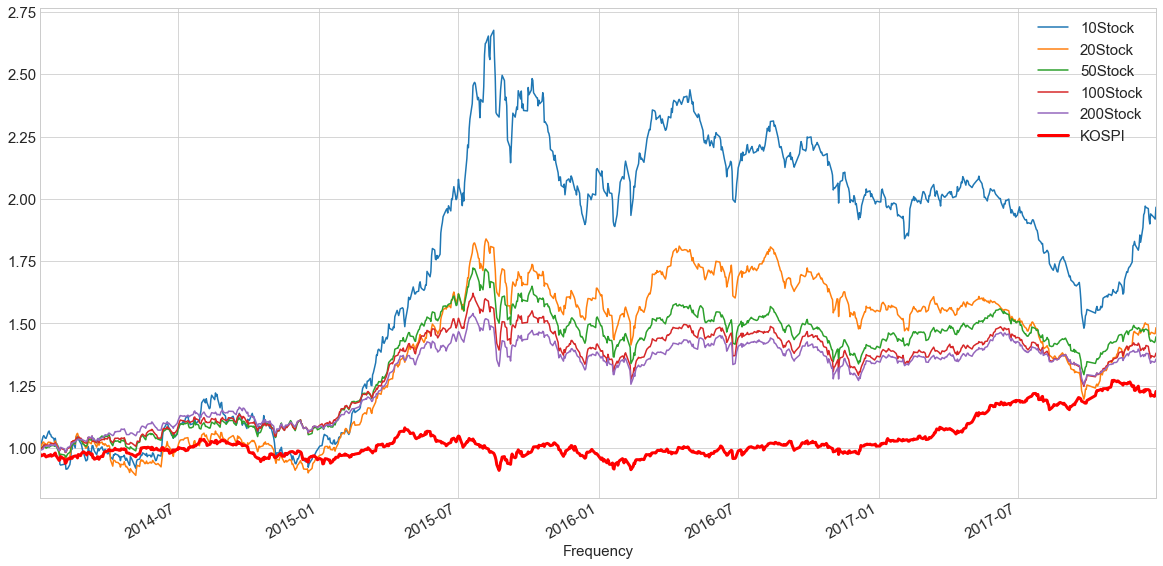

In [94]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))

n_momentum(10)['Return'].plot(ax = ax) ## 10종목
n_momentum(20)['Return'].plot(ax = ax) ## 20종목
n_momentum(50)['Return'].plot(ax = ax) ## 50종목
n_momentum(100)['Return'].plot(ax = ax) ## 100종목
n_momentum(200)['Return'].plot(ax = ax) ## 200종목
kspi_idx_rt_cump.plot(ax = ax, linewidth = 3, color = 'r')
ax.legend()

In [74]:
n_momentum(10)['Stock']

,2014,2015,2016,2017
0,STX중공업,삼호,효성ITX,폴루스바이오팜
1,STX엔진,대림B&Co,롯데관광개발,국동
2,이스타코,까뮤이앤씨,국동,이월드
3,코아스,일진홀딩스,신한,현대리바트
4,삼화페인트,일진전기,이스타코,이화산업
5,STX,화승인더,금강공업,벽산
6,팬오션,SPC삼립,화성산업,MH에탄올
7,일신석재,에넥스,고려개발,금강공업
8,일진전기,메리츠금융지주,CS홀딩스,화승알앤에이
9,이월드,KB손해보험,성신양회,DRB동일


### 개선점

####  1. 대형주 / 중형주 / 소형주로 유니버스를 나눠서 분석
####  2. 시작일을 다르게 설정 (현재 여기서는 매월 첫번째 영업일로 설정)하여 수익률을 산출하여 통계자료 산출할 것
    #### 백테스팅의 강건성을 높일 수 있음
#### 3. 추가적인 데이터 클린징 필요
    #### 데이터에 있지만 실제 투자할 수 없는 주식들을 클린징 하는 작업(ex) 정리 매매 등)
### 4. 슬리피지 코스트 고려